In [79]:
import cv2
import itertools
import numpy as np
from matplotlib import pyplot as plt

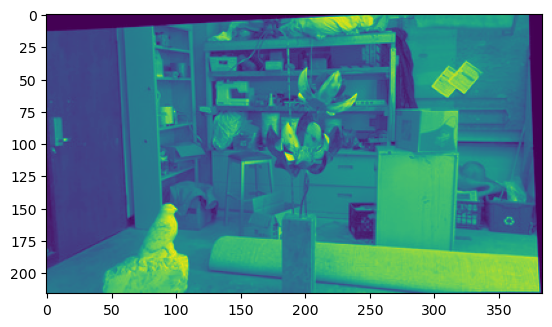

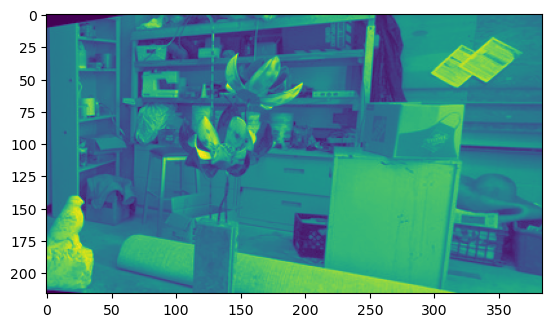

In [80]:
# Loading the left / right images

imgL = cv2.imread("C:\\vishnu\\image\\im1.jpg", cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread("C:\\vishnu\\image\\im2.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(imgL)
plt.figure()
plt.imshow(imgR)

Text(0.5, 1.0, 'Disparity Map')

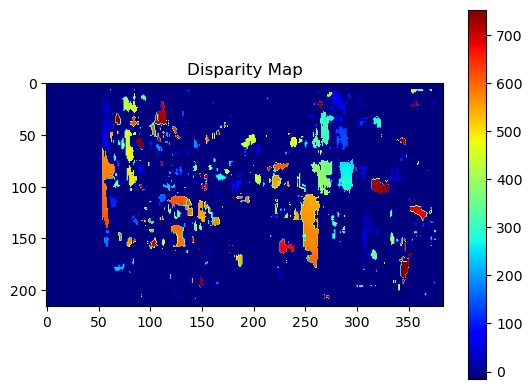

In [81]:
# Create a StereoBM object to compute disparity
stereo = cv2.StereoBM_create(numDisparities=48, blockSize=15)
disparity = stereo.compute(imgL,imgR)
# Display the disparity map using a 'gray' color map
plt.figure()
plt.imshow(disparity, cmap='jet')
plt.colorbar()
plt.title('Disparity Map')

In [94]:
# Define stereo camera parameters (example values)
focal_length = 700 # Focal length in mm (example placeholder)
baseline = 0.1  # Baseline distance between the two cameras in mm (example placeholder)

In [95]:
700*0.1/128

0.546875

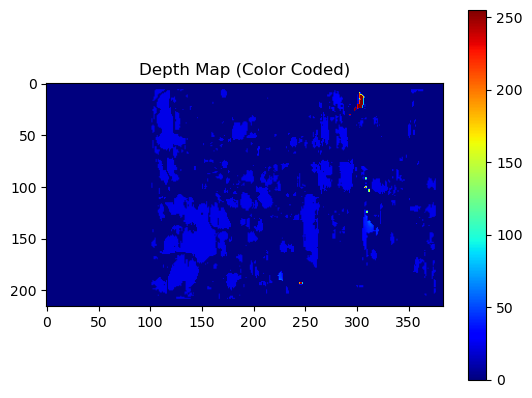

In [96]:
# Avoid division by zero by setting very small disparity values to a minimum value
disparity[disparity == 0] = 0.1

# Calculate the depth map using disparity: Depth = (focal length * baseline) / disparity
depth = (focal_length * baseline) / disparity

# Normalize the depth map for display
depth_normalized = cv2.normalize(depth, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
depth_normalized = np.uint8(depth_normalized)

# Display the depth map using a 'jet' color map
plt.figure()
plt.imshow(depth_normalized, cmap='jet')
plt.colorbar()
plt.title('Depth Map (Color Coded)')

# Show all figures
plt.show()

Text(0.5, 1.0, 'Baseline : 0.3 m')

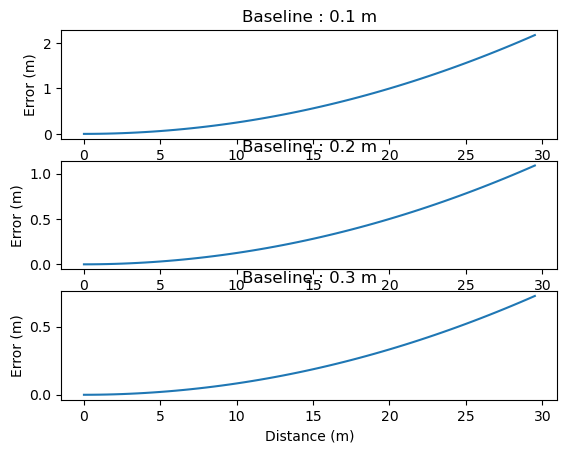

In [133]:
# Stereo error
ed = 0.1
baseline = 0.1
focal_length = 400

zrange = np.arange(0.01, 30.00, 0.5)

ez1 = [(z*z*ed)/(baseline*focal_length) for z in zrange]  #quaratic

fig, axes = plt.subplots(3,1)

axes[0].plot(zrange, ez1)
axes[0].set(ylabel='Error (m)')
axes[0].set_title(f'Baseline : {baseline} m')

baseline = 0.2
ez2 = [(z*z*ed)/(baseline*focal_length) for z in zrange]
axes[1].plot(zrange, ez2)
axes[1].set(ylabel='Error (m)')
axes[1].set_title(f'Baseline : {baseline} m')

baseline = 0.3
ez3 = [(z*z*ed)/(baseline*focal_length) for z in zrange]
axes[2].plot(zrange, ez3)
axes[2].set(xlabel='Distance (m)')
axes[2].set(ylabel='Error (m)')
axes[2].set_title(f'Baseline : {baseline} m')


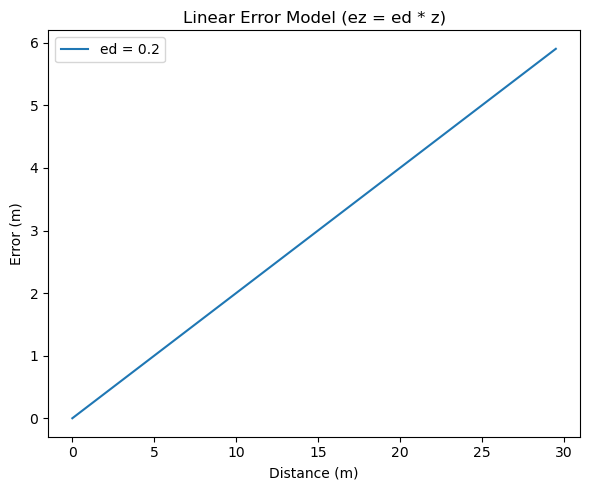

In [134]:
# Stereo error - linear relationship with distance
ed = 0.2
zrange = np.arange(0.01, 30.00, 0.5)  # Distance range

# Linear error model: ez = ed * z
ez1 = [ed * z for z in zrange]

fig, axes = plt.subplots(1, 1, figsize=(6, 5))


# Plot the linear error (ez = ed * z)
axes.plot(zrange, ez1, label=f'ed = {ed}')
axes.set(xlabel='Distance (m)', ylabel='Error (m)', title='Linear Error Model (ez = ed * z)')

axes.legend()

plt.tight_layout()
plt.show()